# WeatherPy
----


In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from matplotlib import colors as mcolors

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [42]:
weather_api_key

'87734b995d714e3fb904706a4dba60ff'

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
#weather data
base_url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [45]:
#lists 
city_name = []
lat = []
lng = []
max_temp = []
cloudiness = []
humidity = []
wind = []
country = []
date = []

record_count = 0 
set_count = 0 

In [46]:
#print log 
print("Beginning Data Retrieval")
print("------------------------")
    
#loop through weather data 
for city in cities: 

    try:
        response = requests.get(query_url + city).json()
        record = response["name"]
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])

        if record_count < 50:
            record_count += 1

        else:
            set_count += 1
            record_count = 0 

        print(f"Processing Record {record_count} of Set {set_count} : {city}")


    except (KeyError, IndexError): 
        print("City Not Found. Skipping...")
        
print(f"-------------------")
print(f"Data Retrieval Complete")
print(f"-------------------")

Beginning Data Retrieval
------------------------
City Not Found. Skipping...
City Not Found. Skipping...
Processing Record 1 of Set 0 : sweetwater
Processing Record 2 of Set 0 : codrington
Processing Record 3 of Set 0 : ushuaia
Processing Record 4 of Set 0 : new norfolk
Processing Record 5 of Set 0 : vaini
Processing Record 6 of Set 0 : bredasdorp
Processing Record 7 of Set 0 : carnarvon
Processing Record 8 of Set 0 : namibe
Processing Record 9 of Set 0 : maniitsoq
Processing Record 10 of Set 0 : ilo
Processing Record 11 of Set 0 : busselton
Processing Record 12 of Set 0 : jamestown
Processing Record 13 of Set 0 : vila velha
Processing Record 14 of Set 0 : albany
Processing Record 15 of Set 0 : hobart
Processing Record 16 of Set 0 : mataura
City Not Found. Skipping...
Processing Record 17 of Set 0 : eureka
Processing Record 18 of Set 0 : flekkefjord
Processing Record 19 of Set 0 : tiksi
Processing Record 20 of Set 0 : dalbandin
Processing Record 21 of Set 0 : hermanus
Processing Recor

Processing Record 31 of Set 3 : karratha
City Not Found. Skipping...
Processing Record 32 of Set 3 : lyuban
Processing Record 33 of Set 3 : kasongo
Processing Record 34 of Set 3 : medina del campo
Processing Record 35 of Set 3 : mancio lima
Processing Record 36 of Set 3 : sakaraha
Processing Record 37 of Set 3 : aksu
Processing Record 38 of Set 3 : jacobabad
Processing Record 39 of Set 3 : kavaratti
City Not Found. Skipping...
Processing Record 40 of Set 3 : xinmin
Processing Record 41 of Set 3 : broken hill
Processing Record 42 of Set 3 : kyshtovka
Processing Record 43 of Set 3 : fort-shevchenko
Processing Record 44 of Set 3 : pilot butte
Processing Record 45 of Set 3 : banda aceh
Processing Record 46 of Set 3 : westport
Processing Record 47 of Set 3 : pacific grove
Processing Record 48 of Set 3 : longyearbyen
Processing Record 49 of Set 3 : tilichiki
Processing Record 50 of Set 3 : rayong
Processing Record 0 of Set 4 : san ramon
Processing Record 1 of Set 4 : sisimiut
Processing Reco

Processing Record 18 of Set 7 : bouca
Processing Record 19 of Set 7 : flin flon
Processing Record 20 of Set 7 : viadana
Processing Record 21 of Set 7 : kununurra
Processing Record 22 of Set 7 : tibati
Processing Record 23 of Set 7 : mongagua
Processing Record 24 of Set 7 : lahaina
Processing Record 25 of Set 7 : grand gaube
Processing Record 26 of Set 7 : nouakchott
Processing Record 27 of Set 7 : port augusta
Processing Record 28 of Set 7 : porosozero
Processing Record 29 of Set 7 : san benito
Processing Record 30 of Set 7 : lipin bor
Processing Record 31 of Set 7 : katsuura
Processing Record 32 of Set 7 : kourou
Processing Record 33 of Set 7 : macrohon
Processing Record 34 of Set 7 : nanortalik
Processing Record 35 of Set 7 : raudeberg
Processing Record 36 of Set 7 : auki
Processing Record 37 of Set 7 : mahanoro
Processing Record 38 of Set 7 : methoni
Processing Record 39 of Set 7 : luau
Processing Record 40 of Set 7 : tevaitoa
Processing Record 41 of Set 7 : uppsala
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
#display dataframe
cities_clean = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": max_temp,
    "Cloudiness": cloudiness,
    "Humidity": humidity, 
    "Wind": wind,
    "Country": country,
    "Date": date
}

city_data = pd.DataFrame(cities_clean)
city_data.count()

City           555
Latitude       555
Longitude      555
Temperature    555
Cloudiness     555
Humidity       555
Wind           555
Country        555
Date           555
dtype: int64

In [48]:
city_data.head()

,City,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind,Country,Date
0,Sweetwater,25.7634,-80.3731,78.01,75,60,6.91,US,1616264529
1,Codrington,-38.2667,141.9667,58.75,100,90,7.52,AU,1616264529
2,Ushuaia,-54.8000,-68.3000,48.20,40,57,26.46,AR,1616264530
3,New Norfolk,-42.7826,147.0587,60.80,90,59,5.75,AU,1616263936
4,Vaini,-21.2000,-175.2000,75.20,40,100,3.44,TO,1616263949


In [49]:
#save to csv
city_data.to_csv("../output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

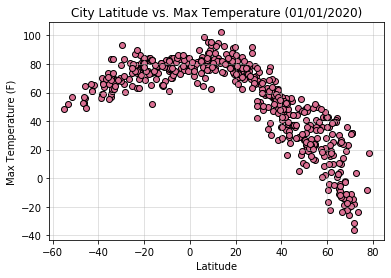

In [50]:
#lat vs. temp scatter plot 
plt.scatter(cities_clean["Latitude"], cities_clean["Temperature"], facecolor = "palevioletred", edgecolor = "black")

#plot formatting
plt.title("City Latitude vs. Max Temperature (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure 
plt.savefig("../output_data/City Latitude vs Temp.png")

## Latitude vs. Humidity Plot

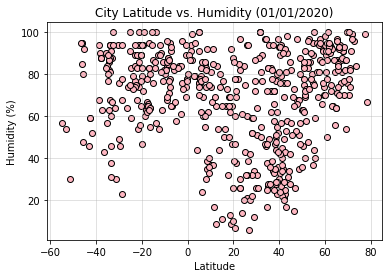

In [51]:
#lat vs. humidity scatter plot
plt.scatter(cities_clean["Latitude"], cities_clean["Humidity"], facecolor = "lightpink", edgecolor = "black")

#plot formatting
plt.title("City Latitude vs. Humidity (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure 
plt.savefig("../output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

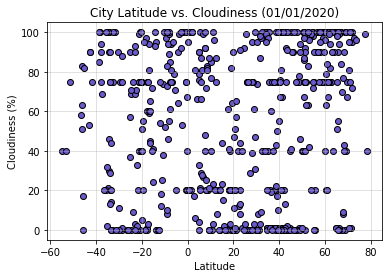

In [52]:
#lat vs. cloudiness scatter plot
plt.scatter(cities_clean["Latitude"], cities_clean["Cloudiness"], facecolor = "slateblue", edgecolor = "black")

#plot formatting
plt.title("City Latitude vs. Cloudiness (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure 
plt.savefig("../output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

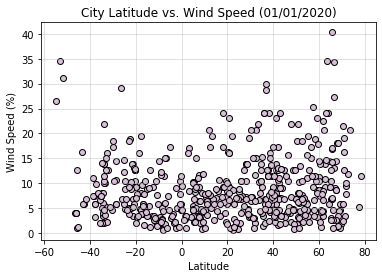

In [53]:
#lat vs. wind scatter plot
plt.scatter(cities_clean["Latitude"], cities_clean["Wind"], facecolor = "thistle", edgecolor = "black")

#plot formatting
plt.title("City Latitude vs. Wind Speed (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure 
plt.savefig("../output_data/City Latitude vs Wind Speed.png")

## Linear Regression

In [55]:
#nothern & southern hemisphere data
northern_h = city_data.loc[city_data["Latitude"] >= 0]
southern_h = city_data.loc[city_data["Longitude"] < 0]

In [63]:
#linear regression function 
def linear_agression(x,y):
    print(f"r-squared: {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_value = x * slope + intercept 
    line_equation = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
    
    #scatter plot
    plt.scatter(x,y, facecolor= "cornflowerblue", edgecolor="black")
    plt.plot(x, regress_value, "r-")
    
    return line_equation
    
#annotation 
def annotate (line_equation, a, b):
    plt.annotate(line_equation,(a, b), fontsize= 12, color= "black")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.89


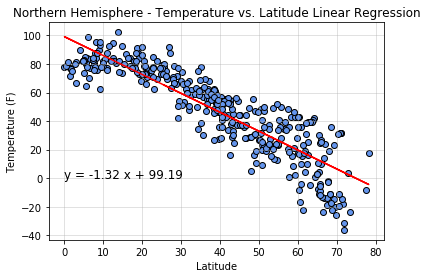

In [64]:
#call linear regression function 
equation = linear_agression(northern_h["Latitude"], northern_h["Temperature"])

#call annotation function
annotate(equation, 0, 0)

#plot formatting
plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure
plt.savefig("../output_data/Northern Hemisphere - Temperature vs. Latitude LR.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.71


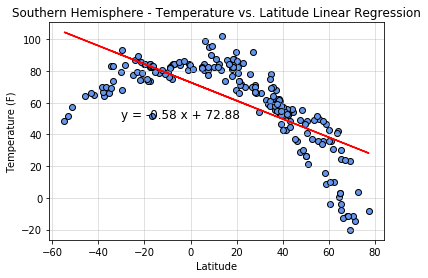

In [65]:
#call linear regression function 
equation = linear_agression(southern_h["Latitude"], southern_h["Temperature"])

#call annotation function
annotate(equation, -30, 50)

#plot formatting
plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure
plt.savefig("../output_data/Southern Hemisphere - Temperature vs. Latitude LR.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.27


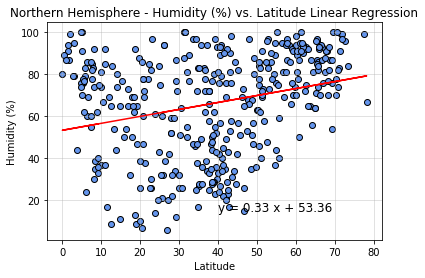

In [67]:
#call linear regression function 
equation = linear_agression(northern_h["Latitude"], northern_h["Humidity"])

#call annotation function
annotate(equation, 40, 15)

#plot formatting
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure
plt.savefig("../output_data/Northern Hemisphere - Humidity(%) vs. Latitude LR.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: -0.04


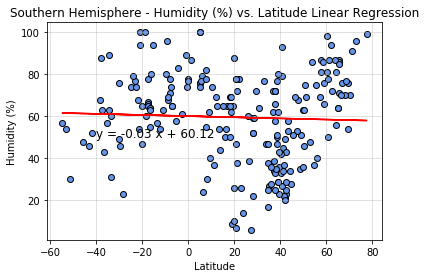

In [68]:
#call linear regression function 
equation = linear_agression(southern_h["Latitude"], southern_h["Humidity"])

#call annotation function
annotate(equation, -40, 50)

#plot formatting
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure
plt.savefig("../output_data/Southern Hemisphere - Humidity(%) vs. Latitude LR.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.25


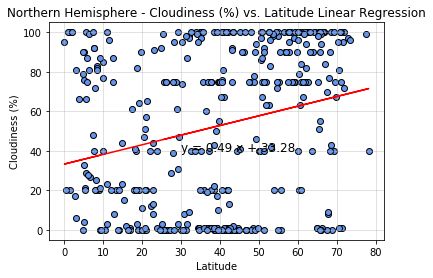

In [69]:
#call linear regression function 
equation = linear_agression(northern_h["Latitude"], northern_h["Cloudiness"])

#call annotation function
annotate(equation, 30, 40)

#plot formatting
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness(%) vs. Latitude LR.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: -0.01


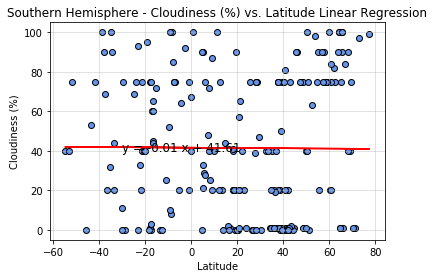

In [73]:
#call linear regression function 
equation = linear_agression(southern_h["Latitude"], southern_h["Cloudiness"])

#call annotation function
annotate(equation, -30, 40)

#plot formatting
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness(%) vs. Latitude LR.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.18


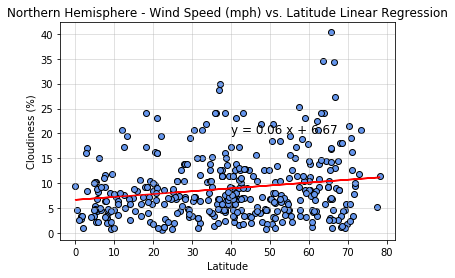

In [71]:
#call linear regression function 
equation = linear_agression(northern_h["Latitude"], northern_h["Wind"])

#call annotation function
annotate(equation, 40, 20)

#plot formatting
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude LR.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.01


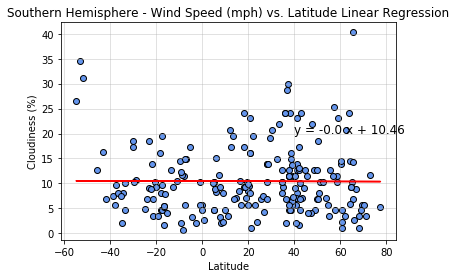

In [72]:
#call linear regression function 
equation = linear_agression(southern_h["Latitude"], southern_h["Wind"])

#call annotation function
annotate(equation, 40, 20)

#plot formatting
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="-", linewidth=0.5, alpha=.75)

#save figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude LR.png")